<center><font size = "10"> Week 3 - Ion Channels <center>
<center><font size = "8">Tutorial 03: Channel Kinetics<center>

<font size = "3"><font color = "blue">In this tutorial you will study how channel kinetics affects the cell response

# The Action Potential


The action potential in a neuron is mediated by two specific kinds of ion channels.

Voltage-gated potassium channels, and Voltage-gated sodium channels.

<img src="Typical-Nerve-Action-Potential_W640.jpg" width="500" height="250"> 

# Setup

In [1]:
# This will compile the mechanisms inside the MOD files (and create a new folder x86_64/special).
! nrnivmodl

/Users/wesleymonteith/miniconda3/envs/biophysics/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/usr/bin/xcrun
/Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Week 3
Mod files: "./Ca.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../Ca.mod
Translating Ca.mod into /Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Week 3/x86_64/Ca.c
Thread Safe
 -> Compiling Ca.c
Ca.c:43:18: warning: a function declaration without a prototype is deprecated in all versions of C and is treated as a zero-parameter prototype in C2x, conflicting with a previous declaration [-Wdeprecated-non-prototype]
         extern double *getarg();
                        ^
/Users/wesleymonteith/miniconda3/envs/biophysics/lib/python3.12/site-packages/neuron/.data/include/hocdec.h:15:17: note: expanded from macro

In [2]:
from neuron import h
import matplotlib.pyplot as plt
%matplotlib inline

h.load_file('stdrun.hoc')

--No graphics will be displayed.


1.0

# 1. Channels with conductance = 0

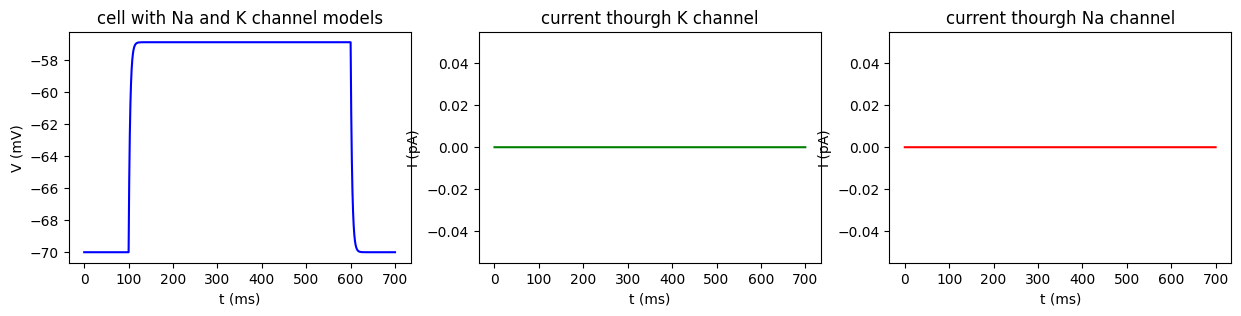

In [3]:
# Create a section 
soma = h.Section()
soma.L = 18.0     # length (µm)
soma.diam = 18.0  # diameter (µm)
soma.Ra = 123.0   # axial resistivity (Ω*cm)
soma.nseg = 1

# Insert passive properties
#soma.insert('pas')
#for seg in soma:
soma.insert('hh')
for seg in soma:
    seg.hh.gl = 0.0003 # Conductance of the leak channels (in S/cm2)
    seg.hh.el = -70   # Leak reversal potential, it influences the steady state membrane potential

# INSERT CHANNEL MODELS
# conductance to 0, so NO active channels --> PASIVE CELL
#soma.insert('K_Ch')
for seg in soma:
    seg.hh.gkbar = 0   # Maximal conductance of the potassium channels

#soma.insert('Na_Ch')
for seg in soma:
    seg.hh.gnabar = 0   # Maximal conductance of the sodium channels
    
# Inject a current step into the soma
stim = h.IClamp(soma(0.5))         # Place a stimulation electrode in the middle of the soma
stim.delay = 100   # stim delay (ms)
stim.amp = 0.04    # stim amplitude (pA)
stim.dur = 500     # stim duration (ms)

# Initialize NEURON vectors to record time, voltage and current
# time vector
rec_t = h.Vector()
rec_t.record(h._ref_t)
# membrame potential vector
rec_v = h.Vector()
rec_v.record(soma(0.5)._ref_v)

# Na current
rec_iNa = h.Vector()
rec_iNa.record(soma(0.5)._ref_ina)
# K current
rec_iK = h.Vector()
rec_iK.record(soma(0.5)._ref_ik)

# Initialize and run a simulation
h.finitialize(-70)    # initial voltage 
h.continuerun(700)    # total recording duration

# PLOT
plt.figure(figsize=(15,3))
plt.subplot(131)
plt.title('cell with Na and K channel models')
plt.ylabel('V (mV)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_v, 'b')

plt.subplot(132)
plt.title('current thourgh K channel')
plt.ylabel('I (pA)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_iK, 'g')

plt.subplot(133)
plt.title('current thourgh Na channel')
plt.ylabel('I (pA)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_iNa, 'r')

# 2. Including only K$^{+}$ 

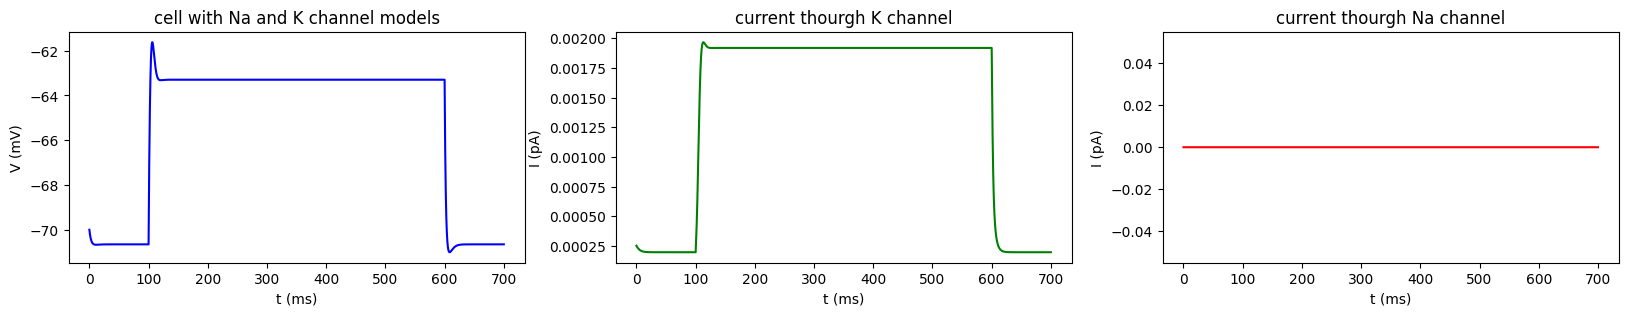

In [4]:
#################### ONLY K+
# insert models
# Activating only K
#soma.insert('K_Ch')
for seg in soma:
    seg.hh.gkbar = 0.01   # Maximal conductance of the potassium channels

# Initialize and run a simulation
h.finitialize(-70)    # initial voltage 
h.continuerun(700)    # total recording duration

# PLOT
plt.figure(figsize=(20,3))
plt.subplot(131)
plt.title('cell with Na and K channel models')
plt.ylabel('V (mV)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_v, 'b')

plt.subplot(132)
plt.title('current thourgh K channel')
plt.ylabel('I (pA)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_iK, 'g')

plt.subplot(133)
plt.title('current thourgh Na channel')
plt.ylabel('I (pA)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_iNa, 'r')

# 3. Including only Na$^{+}$ 

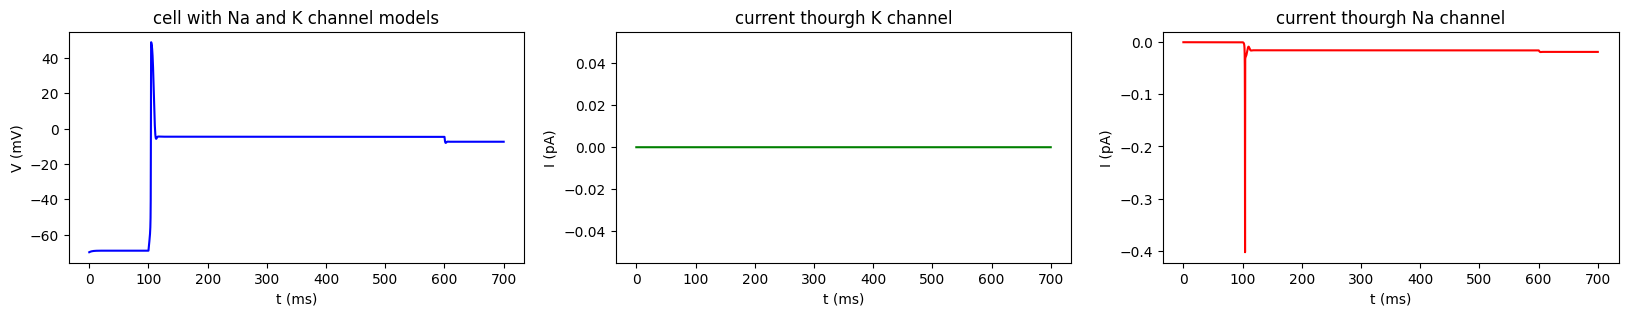

In [5]:
####################### ONLY Na+
# insert models
# Activating only Na
#soma.insert('K_Ch')
for seg in soma:
    seg.hh.gkbar = 0   # Maximal conductance of the potassium channels

#soma.insert('Na_Ch')
for seg in soma:
    seg.hh.gnabar = 0.09   # Maximal conductance of the sodium channels

stim.amp = 0.04    # stim amplitude (pA)
    
# Initialize and run a simulation
h.finitialize(-70)    # initial voltage 
h.continuerun(700)    # total recording duration

# PLOT
plt.figure(figsize=(20,3))
plt.subplot(131)
plt.title('cell with Na and K channel models')
plt.ylabel('V (mV)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_v, 'b')

plt.subplot(132)
plt.title('current thourgh K channel')
plt.ylabel('I (pA)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_iK, 'g')

plt.subplot(133)
plt.title('current thourgh Na channel')
plt.ylabel('I (pA)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_iNa, 'r')

# 4. Including both channels

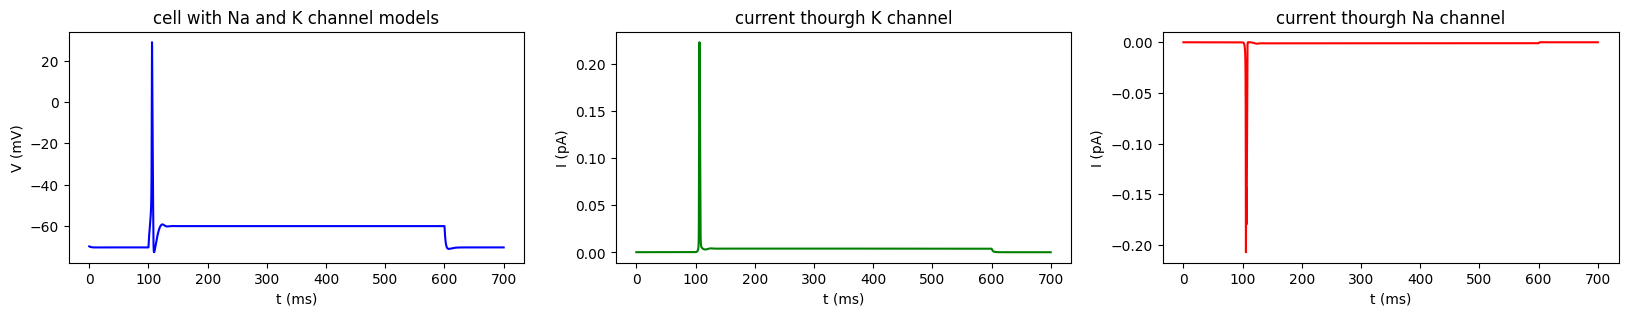

In [6]:
####################### Na+ and K+
# insert models
# Activating only Na
#soma.insert('K_Ch')
for seg in soma:
    seg.hh.gkbar = 0.01   # Maximal conductance of the potassium channels

#soma.insert('Na_Ch')
for seg in soma:
    seg.hh.gnabar = 0.03   # Maximal conductance of the sodium channels

stim.amp = 0.06    # stim amplitude (pA)
    
# Initialize and run a simulation
h.finitialize(-70)    # initial voltage 
h.continuerun(700)    # total recording duration

# PLOT
plt.figure(figsize=(20,3))
plt.subplot(131)
plt.title('cell with Na and K channel models')
plt.ylabel('V (mV)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_v, 'b')

plt.subplot(132)
plt.title('current thourgh K channel')
plt.ylabel('I (pA)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_iK, 'g')

plt.subplot(133)
plt.title('current thourgh Na channel')
plt.ylabel('I (pA)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_iNa, 'r')

# 5. Stimulation amplitude importance

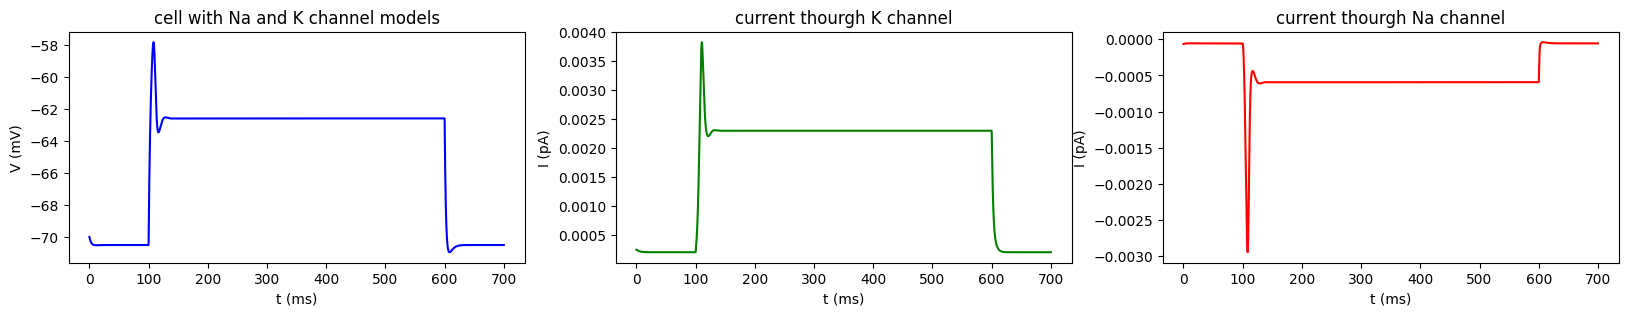

In [7]:
stim.amp = 0.04    # stim amplitude (pA)
    
# Initialize and run a simulation
h.finitialize(-70)    # initial voltage 
h.continuerun(700)    # total recording duration

# PLOT
plt.figure(figsize=(20,3))
plt.subplot(131)
plt.title('cell with Na and K channel models')
plt.ylabel('V (mV)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_v, 'b')

plt.subplot(132)
plt.title('current thourgh K channel')
plt.ylabel('I (pA)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_iK, 'g')

plt.subplot(133)
plt.title('current thourgh Na channel')
plt.ylabel('I (pA)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_iNa, 'r')

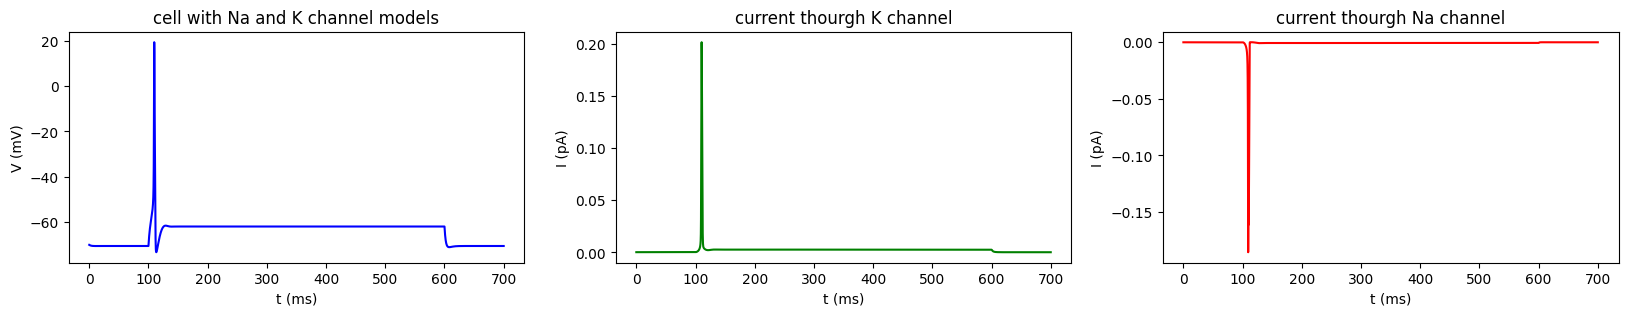

In [8]:
# A little bit more of injected current will make the cell fire.
# This is the minimum current to make the neuron fire

stim.amp = 0.045 # stim amplitude (pA)
    
# Initialize and run a simulation
h.finitialize(-70)    # initial voltage 
h.continuerun(700)    # total recording duration

# PLOT
plt.figure(figsize=(20,3))
plt.subplot(131)
plt.title('cell with Na and K channel models')
plt.ylabel('V (mV)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_v, 'b')

plt.subplot(132)
plt.title('current thourgh K channel')
plt.ylabel('I (pA)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_iK, 'g')

plt.subplot(133)
plt.title('current thourgh Na channel')
plt.ylabel('I (pA)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_iNa, 'r')